<h1 style="color: #FF8C00;">Portfolio Analyst. Prueba Python.</h1>

---

La siguiente prueba consistirá en hacer una serie de cálculos y gráficos para analizar un conjunto de activos financieros.

Para ello deberás desarrollar el código necesario que permita realizar cada una de las tareas.


<h2 style="color: #FF6347;">Import de librerías a usar</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

<h1 style="color: #FF8C00;">Ejercicio 1. Carga de datos y gráfico de precios.</h1>

En este primer ejercicio debes cargar el fichero que contiene los precios de los activos financieros a analizar. Este fichero se llama `financial_assets_prices.csv`.

Una vez cargados los precios de los activos, debes pintarlos en un gráfico temporal. Ten en cuenta que para que puedan ser comparados deben comenzar todas las series en el mismo valor.

<h2 style="color: #FF6347;">Carga de datos</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [131]:
df_asset_prices = pd.read_csv("financial_assets_prices.csv")

In [133]:
df_asset_prices

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,NaN,70.11
779,2021-12-28,249.9368,104.526,39.115000,NaN,70.03
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


In [135]:
df_asset_prices = df_asset_prices.dropna(subset=['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5'])

C:\Users\georg\AppData\Local\Temp\ipykernel_3544\1370613686.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_asset_prices, x='date', y=asset, label=asset, ci=None)
C:\Users\georg\AppData\Local\Temp\ipykernel_3544\1370613686.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_asset_prices, x='date', y=asset, label=asset, ci=None)
C:\Users\georg\AppData\Local\Temp\ipykernel_3544\1370613686.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_asset_prices, x='date', y=asset, label=asset, ci=None)
C:\Users\georg\AppData\Local\Temp\ipykernel_3544\1370613686.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_asset_prices, x='date', y=asset, label=asset, ci=None)
C:\Users\georg\AppData\Local\Temp\ipykernel_3544\137

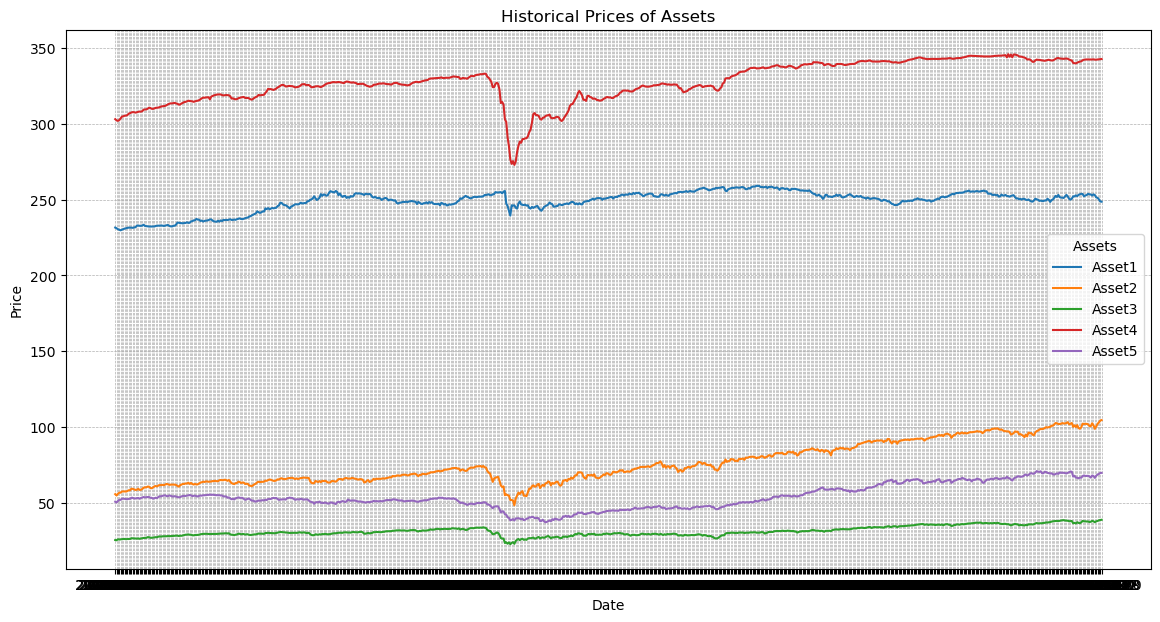

In [137]:
plt.figure(figsize=(14, 7))

# Iterar sobre cada activo y trazar su línea en el mismo gráfico
for asset in ["Asset1", "Asset2", "Asset3", "Asset4", "Asset5"]:
    sns.lineplot(data=df_asset_prices, x='date', y=asset, label=asset, ci=None)

# Configuración adicional del gráfico
plt.title('Historical Prices of Assets')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='Assets')  # Añade una leyenda para diferenciar los activos
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

<h1 style="color: #FF8C00;">Ejercicio 2. Rendimientos diarios porcentuales.</h1>

En este segundo ejercicio debes calcular los rendimientos diarios porcentuales de cada uno de los activos y obtener la siguiente información de ellos:
- Calcular la matriz de correlaciones entre los 5 activos.
- Realizar un gráfico de dispersión entre los rendimientos de 2 activos.

<h2 style="color: #FF6347;">Cálculo de rendimientos diarios.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [139]:
returns = df_asset_prices[['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']].pct_change() * 100
returns

,Asset1,Asset2,Asset3,Asset4,Asset5
0,NaN,NaN,NaN,NaN,NaN
1,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2,-0.273984,2.095422,2.525524,-0.112542,1.924221
3,-0.151170,1.263162,-0.733753,0.185572,1.479175
4,-0.153486,0.100285,0.703977,0.360533,-0.019179
...,...,...,...,...,...
774,-0.607816,1.471034,1.497326,0.002923,1.996997
775,-0.114479,1.750610,0.763962,0.023383,1.295451
776,-0.396077,0.982159,0.967320,0.049677,0.537713
780,-0.558495,1.197576,0.608493,0.023366,0.910668


<h2 style="color: #FF6347;">Cálculo de la matriz de correlaciones.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [141]:
num = df_asset_prices.select_dtypes(include='number')

correlation_matrix = num.corr()

correlation_matrix

,Asset1,Asset2,Asset3,Asset4,Asset5
Asset1,1.000000,0.512296,0.380556,0.568261,0.069369
Asset2,0.512296,1.000000,0.906736,0.880134,0.827004
Asset3,0.380556,0.906736,1.000000,0.880221,0.865331
Asset4,0.568261,0.880134,0.880221,1.000000,0.779235
Asset5,0.069369,0.827004,0.865331,0.779235,1.000000


<h2 style="color: #FF6347;">Gráfico de dispersión entre los rendimientos de 2 activos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

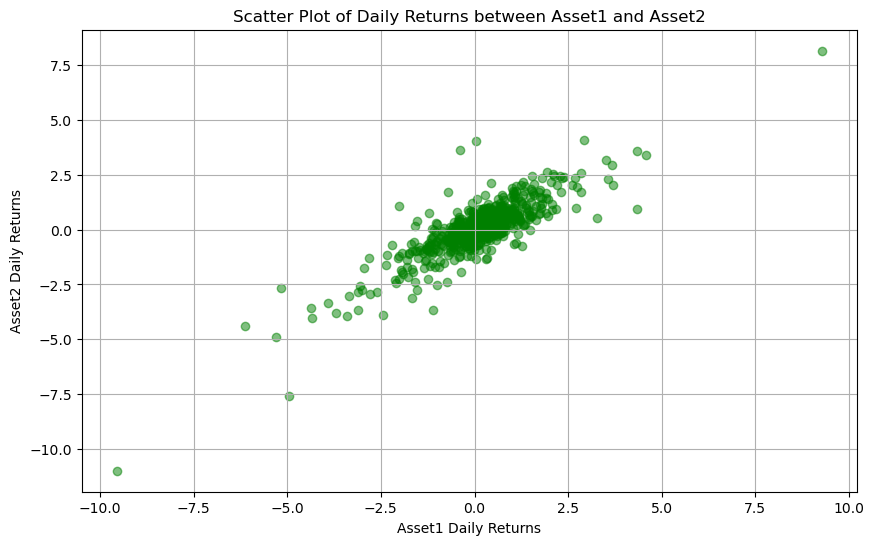

In [143]:
plt.figure(figsize=(10, 6))
plt.scatter(returns['Asset2'], returns['Asset3'], alpha=0.5, color='green')
plt.title("Scatter Plot of Daily Returns between Asset1 and Asset2")
plt.xlabel("Asset1 Daily Returns")
plt.ylabel("Asset2 Daily Returns")
plt.grid(True)
plt.show()

<h1 style="color: #FF8C00;">Ejercicio 3. Análisis de una cartera</h1>

Este tercer ejercicio consiste en calcular y analizar los resultados de una cartera. Para ello será necesario cargar el fichero con los pesos que tiene cada uno de los activos en cada uno de los días. Este fichero se llama `portfolio_weights.csv`.

Para completar el ejercicio, será necesario calcular:
- Gráfico de área de los pesos.
- Gráfico de la rentabilidad histórica acumulada de la cartera.
- Rentabilidad anualizada de la cartera.
- Volatilidad anualizada de la cartera. (Puedes usar el factor de anualización de 261 días)

Extra: Gráfico de área de los pesos de los activos agrupándolos por familia. Esta información está contenida en el fichero `financial_assets_information.csv`.

<h2 style="color: #FF6347;">Gráfico de área de los pesos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [145]:
df_weights = pd.read_csv('portfolio_weights.csv')

In [147]:
df_weights.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


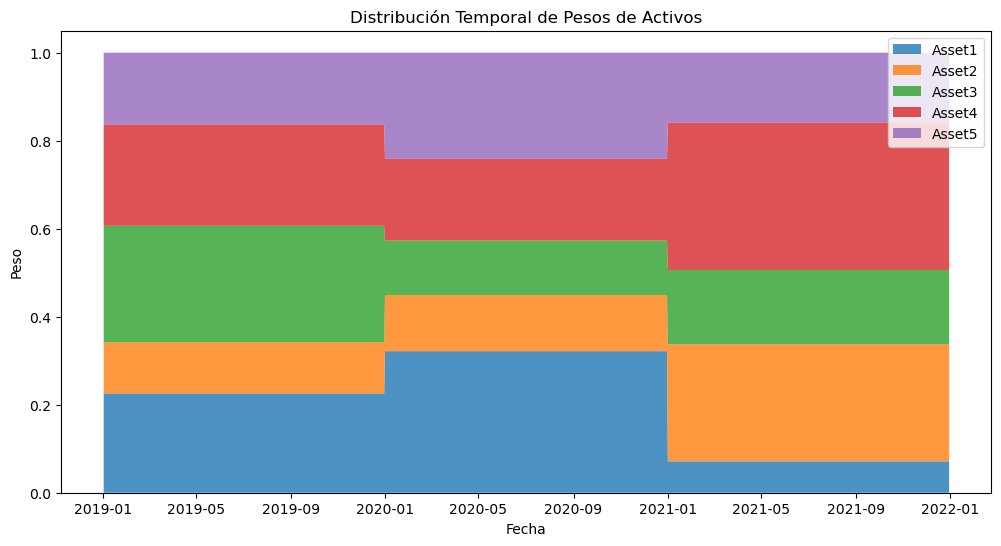

In [149]:
df_weights['date'] = pd.to_datetime(df_weights['date'])
df_weights.set_index('date', inplace=True)

plt.figure(figsize=(12, 6))
plt.stackplot(df_weights.index, df_weights.T, labels=df_weights.columns, alpha=0.8)
plt.legend(loc='upper right')
plt.title("Distribución Temporal de Pesos de Activos")
plt.xlabel("Fecha")
plt.ylabel("Peso")
plt.show()

<h2 style="color: #FF6347;">Gráfico de la rentabilidad histórica acumulada de la cartera.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

C:\Users\georg\AppData\Local\Temp\ipykernel_3544\4034433071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asset_prices['date'] = pd.to_datetime(df_asset_prices['date'])


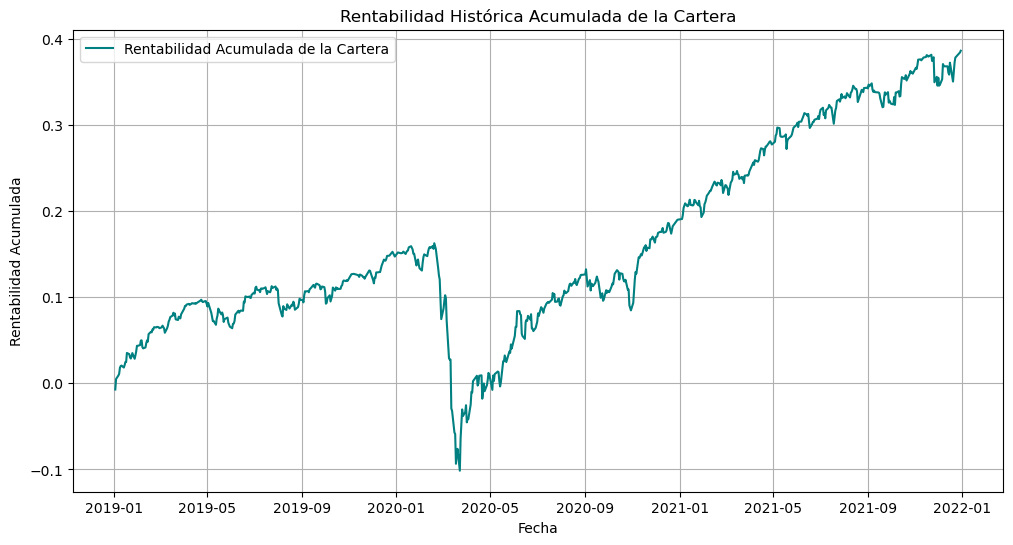

In [151]:
df_asset_prices['date'] = pd.to_datetime(df_asset_prices['date'])
df_asset_prices.set_index('date', inplace=True)

df_returns = df_asset_prices.pct_change()
df_returns['Portfolio'] = df_returns.mean(axis=1)

# Calcular la rentabilidad acumulada de la cartera
df_cumulative_returns = (1 + df_returns['Portfolio']).cumprod() - 1

plt.figure(figsize=(12, 6))
plt.plot(df_cumulative_returns, label="Rentabilidad Acumulada de la Cartera", color="teal")
plt.title("Rentabilidad Histórica Acumulada de la Cartera")
plt.xlabel("Fecha")
plt.ylabel("Rentabilidad Acumulada")
plt.legend()
plt.grid(True)
plt.show()

<h2 style="color: #FF6347;">Rentabilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [153]:
df_cumulative_returns = df_returns['Portfolio'].iloc[-1] - 1

# Calculo el número de años en el período
days = (df_asset_prices.index[-1] - df_asset_prices.index[0]).days
years = days / 252

# Calculo la rentabilidad anualizada
annualized_return = (1 + df_cumulative_returns) ** (1 / years) - 1

print(f"Rentabilidad acumulada: {df_cumulative_returns:.2%}")
print(f"Rentabilidad anualizada: {annualized_return:.2%}")

Rentabilidad acumulada: -99.86%
Rentabilidad anualizada: -77.84%


In [155]:
df_returns

,Asset1,Asset2,Asset3,Asset4,Asset5,Portfolio
date,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432,-0.007188
2019-01-04,-0.002740,0.020954,0.025255,-0.001125,0.019242,0.012317
2019-01-07,-0.001512,0.012632,-0.007338,0.001856,0.014792,0.004086
2019-01-08,-0.001535,0.001003,0.007040,0.003605,-0.000192,0.001984
...,...,...,...,...,...,...
2021-12-21,-0.006078,0.014710,0.014973,0.000029,0.019970,0.008721
2021-12-22,-0.001145,0.017506,0.007640,0.000234,0.012955,0.007438
2021-12-23,-0.003961,0.009822,0.009673,0.000497,0.005377,0.004282


<h2 style="color: #FF6347;">Volatilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [159]:
daily_volatility = df_returns['Portfolio'].std()

# (multiplicamos por la raíz cuadrada de 252)
annualized_volatility = daily_volatility * np.sqrt(252)

print(f"Volatilidad anualizada: {annualized_volatility:.2%}")

Volatilidad anualizada: 10.27%


<h2 style="color: #FF6347;">Extra. Gráfico de área de los pesos de los activos agrupándolos por familia.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [161]:
df_information = pd.read_csv('financial_assets_information.csv')

In [163]:
df_information

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [165]:
df_weights['Fixed income'] = df_weights['Asset1'] + df_weights['Asset2']
df_weights['Equity'] = df_weights['Asset3'] + df_weights['Asset4']
df_weights['Alternative'] = df_weights['Asset5']
df_weights.drop(columns=['Asset1','Asset2','Asset3','Asset4','Asset5'],inplace=True)
df_weights.head()

,Fixed income,Equity,Alternative
date,,,
2019-01-02,0.341713,0.495313,0.162974
2019-01-03,0.341713,0.495313,0.162974
2019-01-04,0.341713,0.495313,0.162974
2019-01-07,0.341713,0.495313,0.162974
2019-01-08,0.341713,0.495313,0.162974


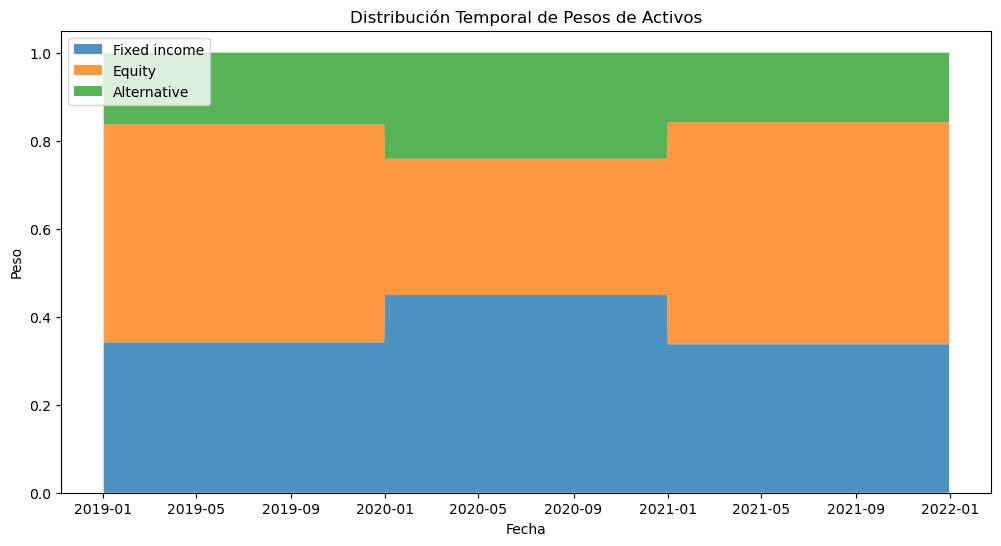

In [167]:
plt.figure(figsize=(12, 6))
plt.stackplot(df_weights.index, df_weights.T, labels=df_weights.columns, alpha=0.8)
plt.legend(loc='upper left')
plt.title("Distribución Temporal de Pesos de Activos")
plt.xlabel("Fecha")
plt.ylabel("Peso")
plt.show()